In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from Scripts.Random_forest_nested import *

In [3]:
df = pd.read_excel('../Data/IAQ_third_data.xlsx', index_col=0)


X,y=df.loc[:,['acetald_season_m18', 'acetone_season_m18', 'form_season_m18',
       'pm25_season_m18', 'nox_season_m18', 'bc_season_m18', 'no2_season_m18',
       'lrti_1y', 'genetic_risk_score_asthma', 'gestational_age',
       'no2_str_m18', 'nox_str_m18', 'pm25_str_m18']],df["mother's_education_1yr"]
NUM_TRIALS=3
X=X.loc[:,X.dtypes!="object"]
scaler = StandardScaler()
scale_house = scaler.fit(X)
X_house=scale_house.transform(X)
imputer = KNNImputer(n_neighbors=10)
X_scaled_landuse=imputer.fit_transform(X_house)
X=pd.DataFrame(X_scaled_landuse,index=X.index,columns=X.columns)

In [4]:
X,y=X.loc[y.isna()==0,:],y[y.isna()==0]

In [5]:

y=y.astype(int)-1

In [6]:
param_distributions = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(2, 10),"min_impurity_decrease":uniform(0.001, 0.03),"min_samples_leaf":[10,15]
,"class_weight":["balanced"],"max_features":[0.9,0.95],"max_samples":[0.9,0.95]}
performence,shap_values,feature_importance,parameter=nested_cross_validation_classification(X,y,2,3,param_distributions)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
done % 0.16666666666666666
Fitting 3 folds for each of 25 candidates, totalling 75 fits
done % 0.3333333333333333
Fitting 3 folds for each of 25 candidates, totalling 75 fits
done % 0.5
Fitting 3 folds for each of 25 candidates, totalling 75 fits
done % 0.6666666666666666
Fitting 3 folds for each of 25 candidates, totalling 75 fits
done % 0.8333333333333334
Fitting 3 folds for each of 25 candidates, totalling 75 fits
done % 1.0


In [7]:
shap_education_1=pd.DataFrame(shap_values[:,:,0],index=X.index,columns=X.columns)
shap_education_2=pd.DataFrame(shap_values[:,:,1],index=X.index,columns=X.columns)
shap_education_4=pd.DataFrame(shap_values[:,:,2],index=X.index,columns=X.columns)
shap_education_5=pd.DataFrame(shap_values[:,:,3],index=X.index,columns=X.columns)
mean_shap=pd.DataFrame([shap_education_1.mean(),shap_education_2.mean(),shap_education_4.mean(),shap_education_5.mean()])

In [8]:
mean_total=mean_shap.T
mean_total.columns=["P","H","B","M"]
mean_total=mean_total.reset_index()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
mean_total

,index,P,H,B,M
0,acetald_season_m18,0.000329,0.000645,-0.000068,-0.000906
1,acetone_season_m18,0.000150,0.000052,0.000329,-0.000531
2,form_season_m18,0.000640,0.000247,0.000540,-0.001428
3,pm25_season_m18,0.013930,-0.003913,-0.004419,-0.005598
4,nox_season_m18,0.001016,-0.001018,0.000734,-0.000733
5,bc_season_m18,0.001450,-0.000323,0.000300,-0.001427
6,no2_season_m18,0.000353,-0.000058,0.000209,-0.000504
7,lrti_1y,0.000032,0.000049,-0.000044,-0.000037
8,genetic_risk_score_asthma,0.000500,-0.000264,0.000706,-0.000943
9,gestational_age,0.000698,0.000095,0.000200,-0.000993


[Text(0, 0.5, '')]

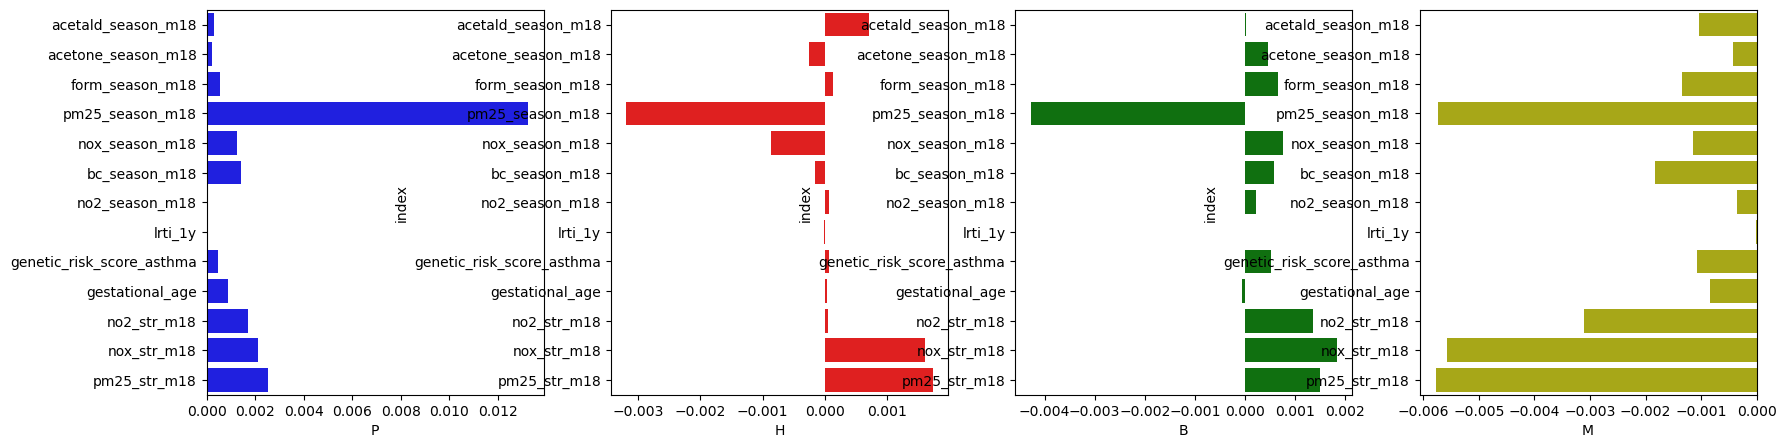

In [9]:
fig,ax=plt.subplots(1,4,figsize=(20,5))
sns.barplot(x="P", y="index", data=mean_total, color="b",ax=ax[0])
# Remove the 'day' label on the x-axis
sns.barplot(x="H", y="index", data=mean_total, color="r",ax=ax[1])

sns.barplot(x="B", y="index", data=mean_total, color="g",ax=ax[2])
sns.barplot(x="M", y="index", data=mean_total, color="y",ax=ax[3])
ax[0].set(ylabel=None)


In [10]:
performence,shap_values,feature_importance

(   AUROC_train  AUROC_test  F1_train   F1_test
 0     0.815377    0.655610  0.559584  0.316324
 1     0.755111    0.606178  0.465254  0.293362
 2     0.726552    0.593108  0.433369  0.300186
 3     0.923933    0.596903  0.728270  0.346452
 4     0.719585    0.643593  0.459654  0.365693
 5     0.741686    0.583790  0.467211  0.297355,
 array([[[-4.44315342e-04, -5.30679849e-03,  3.04775976e-03,
           2.70335407e-03],
         [ 7.46088911e-04,  2.15939521e-02, -1.40774587e-02,
          -8.26258231e-03],
         [-3.78164694e-04,  2.39719300e-04,  2.54669875e-03,
          -2.40825335e-03],
         ...,
         [ 9.71933335e-03,  4.38318182e-03,  4.85889394e-03,
          -1.89614091e-02],
         [ 1.44519997e-02, -9.25237742e-04,  5.36902453e-03,
          -1.88957865e-02],
         [ 2.95885294e-02,  4.21623661e-02,  1.72413572e-02,
          -8.89922527e-02]],
 
        [[-2.92928911e-05, -2.82196642e-03,  3.53709032e-04,
           2.49755028e-03],
         [ 1.32965799e-